In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Cargar los archivos CSV
survey_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Surveydata_train.csv')
travel_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Traveldata_train.csv')

# Mostrar las primeras filas de cada conjunto de datos

display(survey_train.head())
display(travel_train.head())

# Información general de los conjuntos de datos

print(survey_train.info())
print(travel_train.info())

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [23]:
# Unir los datos de encuesta y de viaje
train_data = pd.merge(survey_train, travel_train, on='ID')

# Mostrar las primeras filas del conjunto de datos combinado
display(train_data.head())

# Revisar los valores faltantes en el conjunto de datos combinado
missing_values = train_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0



Missing values in each column:
ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64


In [30]:
# Eugenio: Checar valores unicos
train_data.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           76
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      438
Arrival_Delay_in_Mins        435
dtype: int64

In [31]:
# Eugenio: Eliminar columna de ID porque no aporta ningun dato
train_data=train_data.drop(['ID'],axis=1)

In [33]:
# Eugenio: Ya no hay columnas que no aporten nada
train_data.nunique()

Overall_Experience            2
Seat_Comfort                  6
Seat_Class                    2
Arrival_Time_Convenient       6
Catering                      6
Platform_Location             6
Onboard_Wifi_Service          6
Onboard_Entertainment         6
Online_Support                6
Ease_of_Online_Booking        6
Onboard_Service               6
Legroom                       6
Baggage_Handling              5
CheckIn_Service               6
Cleanliness                   6
Online_Boarding               6
Gender                        2
Customer_Type                 2
Age                          76
Type_Travel                   2
Travel_Class                  2
Travel_Distance            5210
Departure_Delay_in_Mins     438
Arrival_Delay_in_Mins       435
dtype: int64

In [24]:
# Imputar valores faltantes para variables categóricas utilizando la moda
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Imputar valores faltantes para variables numéricas utilizando la media
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

# Verificar si todavía hay valores faltantes
missing_values_after_imputation = train_data.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

Missing values after imputation:
ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64


In [34]:
# Eugenio: checando como queda la informaciom
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Seat_Comfort             94379 non-null  object 
 2   Seat_Class               94379 non-null  object 
 3   Arrival_Time_Convenient  94379 non-null  object 
 4   Catering                 94379 non-null  object 
 5   Platform_Location        94379 non-null  object 
 6   Onboard_Wifi_Service     94379 non-null  object 
 7   Onboard_Entertainment    94379 non-null  object 
 8   Online_Support           94379 non-null  object 
 9   Ease_of_Online_Booking   94379 non-null  object 
 10  Onboard_Service          94379 non-null  object 
 11  Legroom                  94379 non-null  object 
 12  Baggage_Handling         94379 non-null  object 
 13  CheckIn_Service          94379 non-null  object 
 14  Cleanliness           

In [36]:
# Eugenio: Columnas numericas
num_cols=['Overall_Experience','Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']

# Columnas categoricas
cat_cols= ['Seat_Comfort','Seat_Class','Arrival_Time_Convenient', 'Catering','Platform_Location', 'Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking',
           'Onboard_Service','Legroom', 'Baggage_Handling', 'CheckIn_Service','Cleanliness', 'Online_Boarding', 'Gender','Customer_Type','Type_Travel','Travel_Class']

***EDA Analisis exploratorio de datos***

In [37]:
#Eugenio Analisis de cada variable
train_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94379.0,39.419647,15.113989,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94379.0,14.647092,38.127262,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94379.0,15.005222,38.366639,0.0,0.0,0.0,13.0,1584.0


In [38]:
# Eugenio  varibles categoricas
train_data[cat_cols].describe().T

,count,unique,top,freq
Seat_Comfort,94379,6,Acceptable,21219
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,94379,6,Good,28504
Catering,94379,6,Acceptable,27209
Platform_Location,94379,6,Manageable,24203
Onboard_Wifi_Service,94379,6,Good,22865
Onboard_Entertainment,94379,6,Good,30464
Online_Support,94379,6,Good,30107
Ease_of_Online_Booking,94379,6,Good,28982
Onboard_Service,94379,6,Good,34866


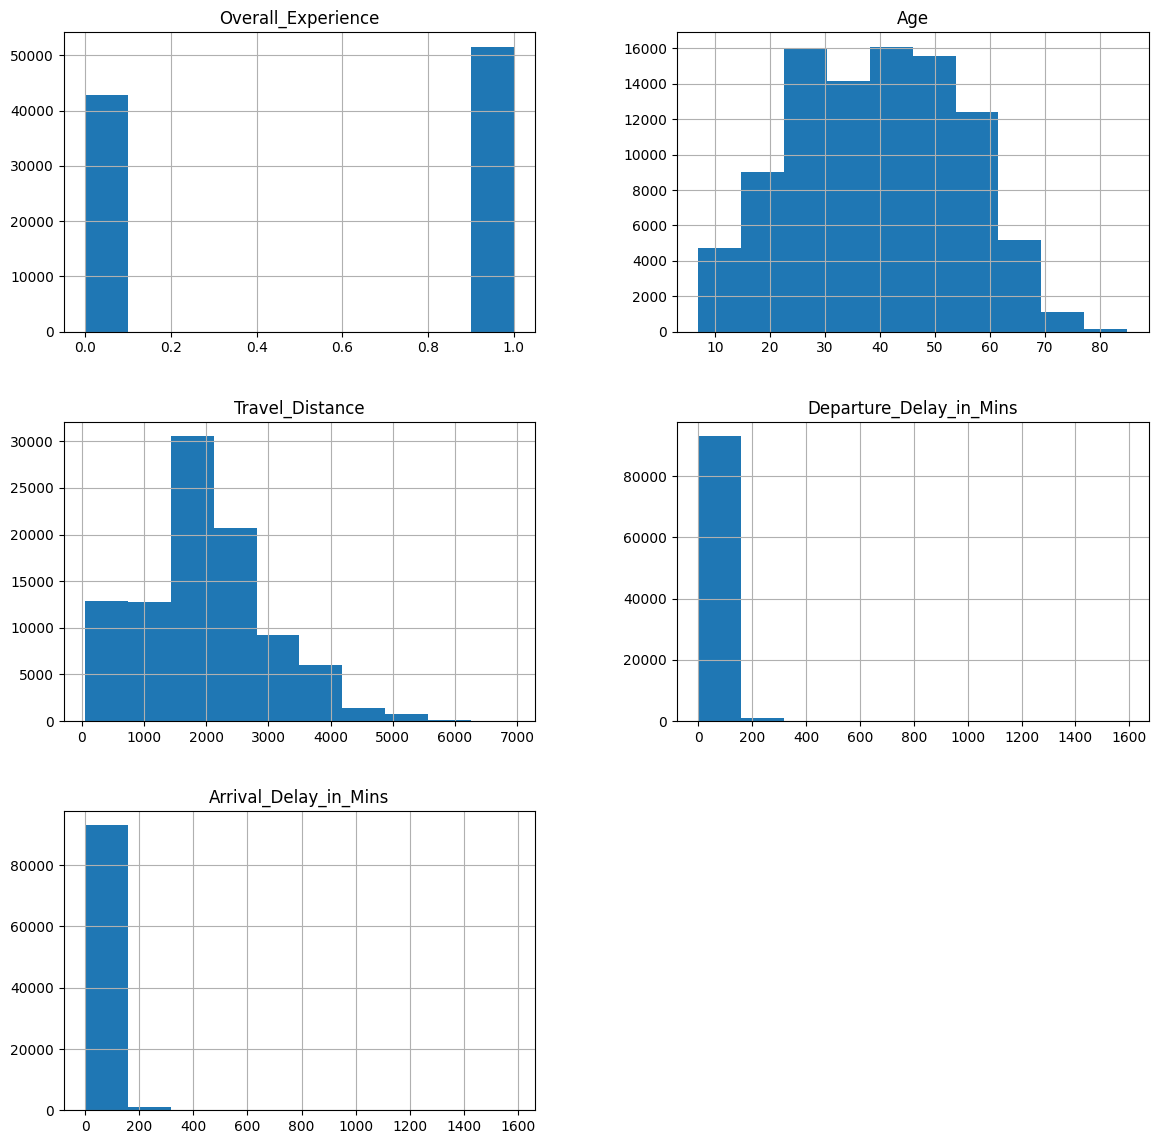

In [39]:
# Eugenio revisando la distribucion de las variables numericas
train_data[num_cols].hist(figsize=(14,14))
plt.show()

In [51]:
train_data.head()

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0
1,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [54]:
# porcentajes de las variables categoricas
for i in cat_cols:
    print(train_data[i].value_counts(normalize=True))
    print('*'*40)

Seat_Comfort
Acceptable           0.224828
Needs Improvement    0.221935
Good                 0.218216
Poor                 0.160894
Excellent            0.137435
Extremely Poor       0.036692
Name: proportion, dtype: float64
****************************************
Seat_Class
Green Car    0.502601
Ordinary     0.497399
Name: proportion, dtype: float64
****************************************
Arrival_Time_Convenient
Good                 0.302016
Excellent            0.187372
Acceptable           0.160809
Needs Improvement    0.158828
Poor                 0.145075
Extremely Poor       0.045900
Name: proportion, dtype: float64
****************************************
Catering
Acceptable           0.288295
Needs Improvement    0.190487
Good                 0.190392
Poor                 0.146834
Excellent            0.142563
Extremely Poor       0.041429
Name: proportion, dtype: float64
****************************************
Platform_Location
Manageable           0.256445
Convenient     

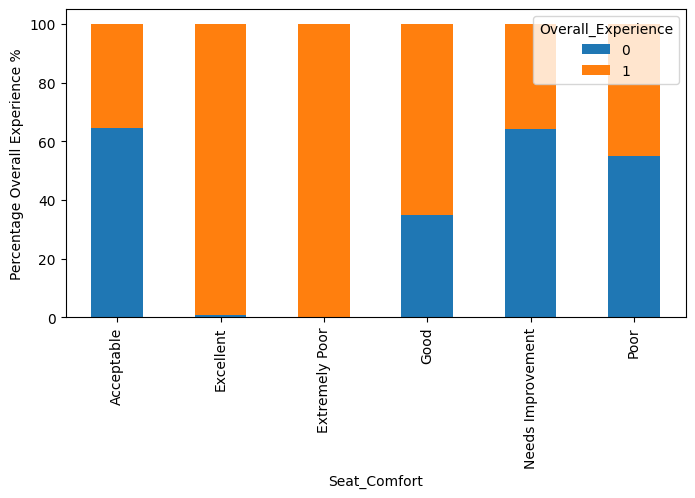

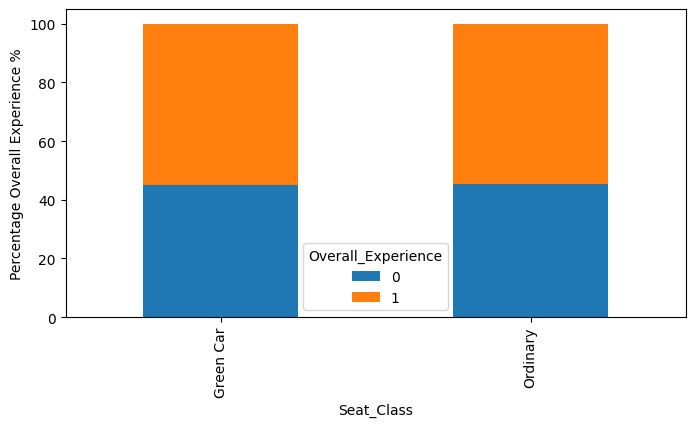

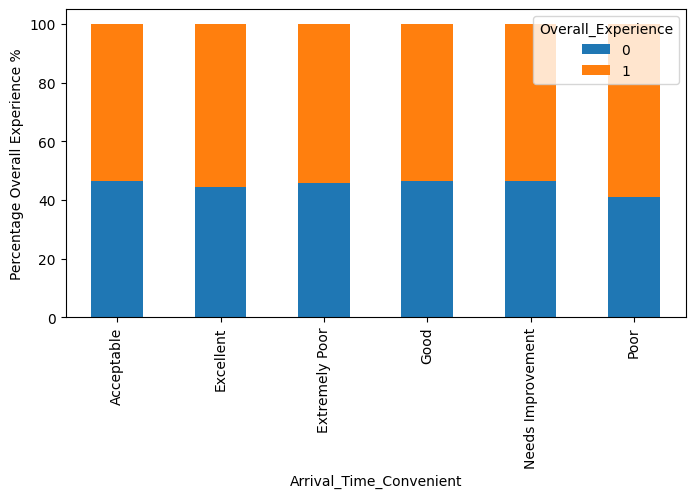

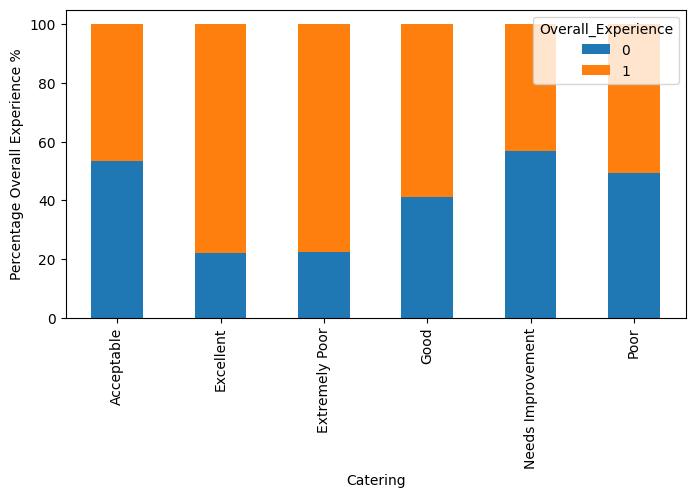

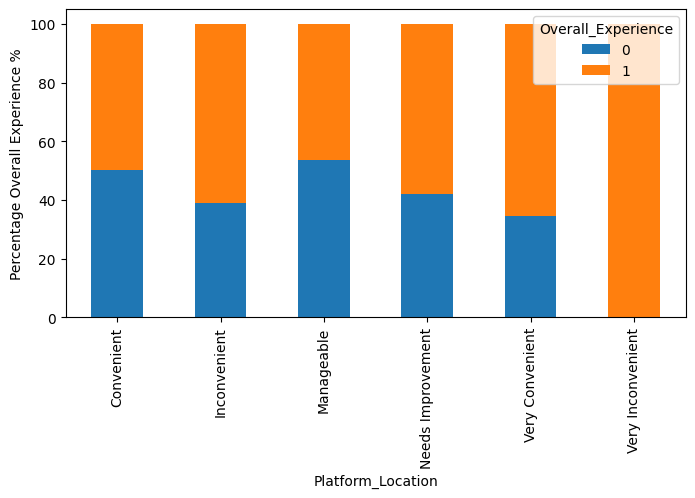

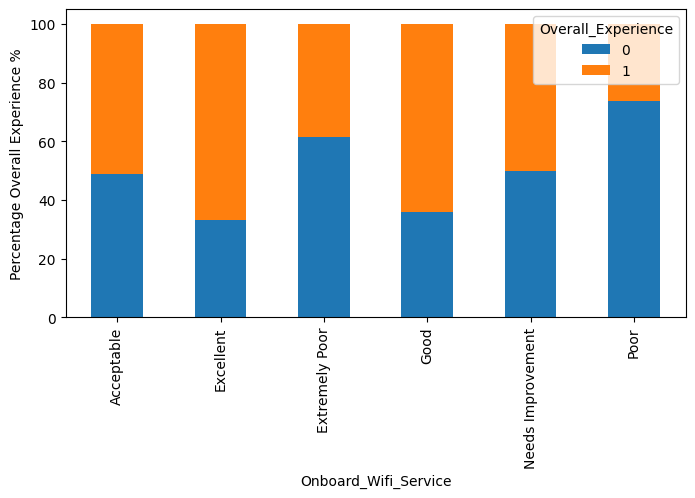

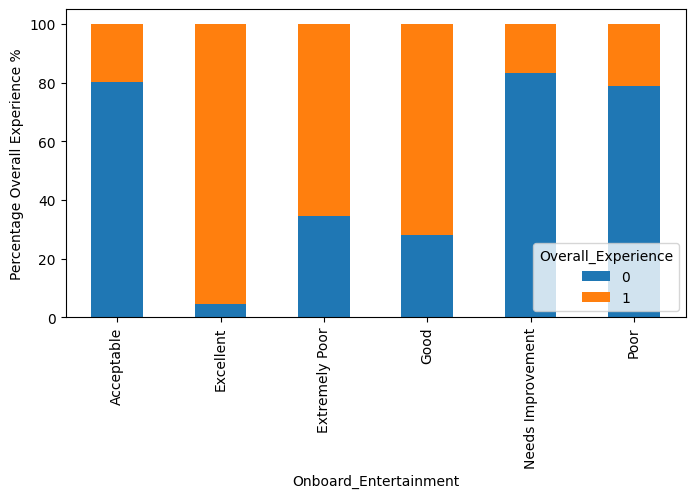

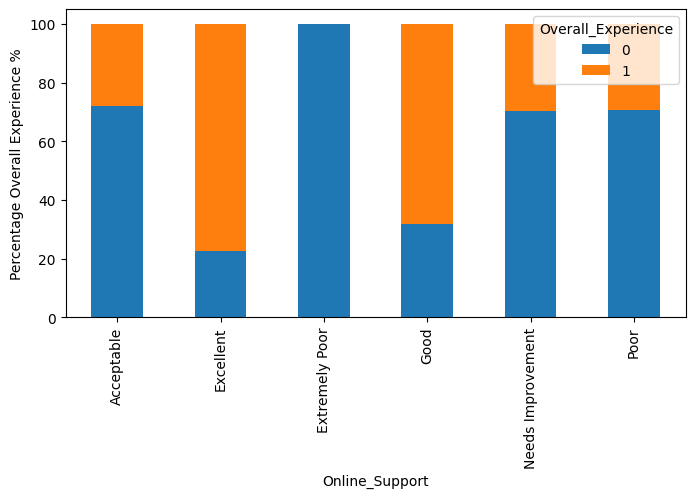

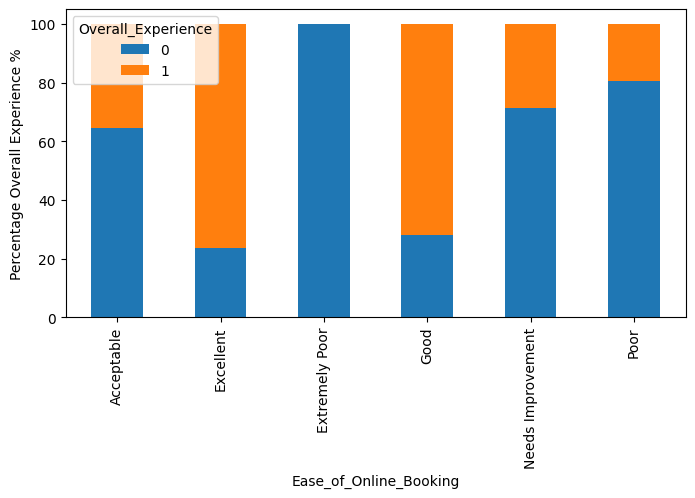

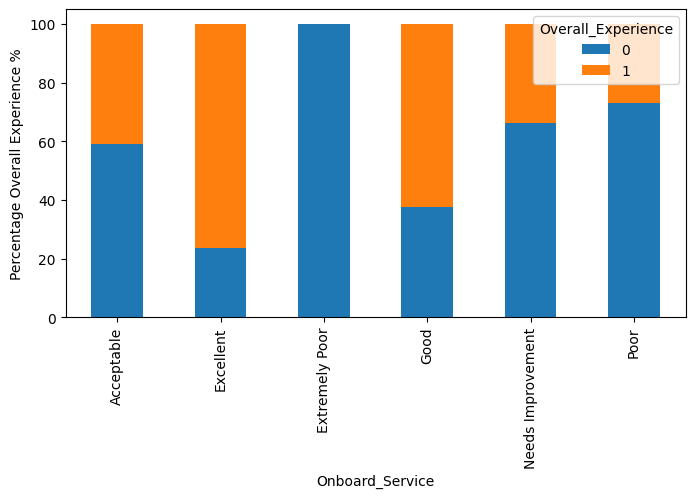

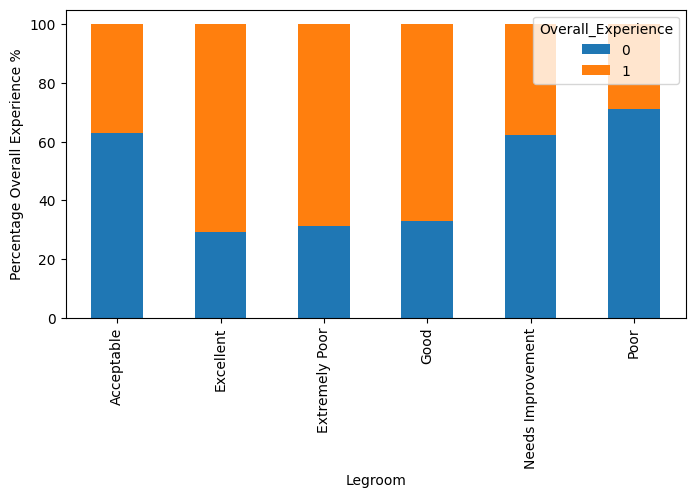

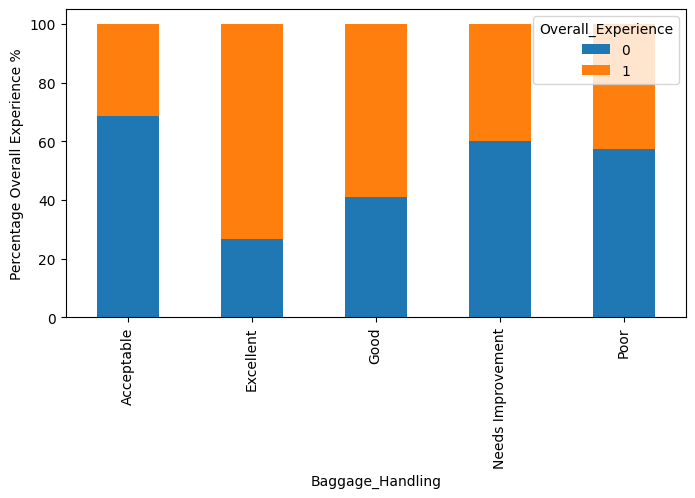

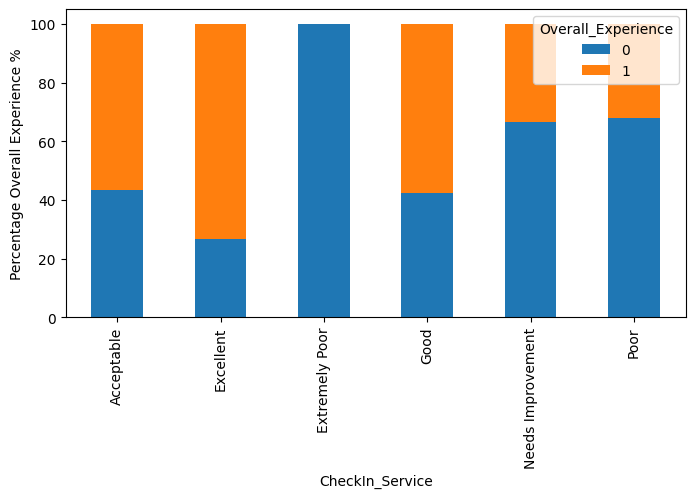

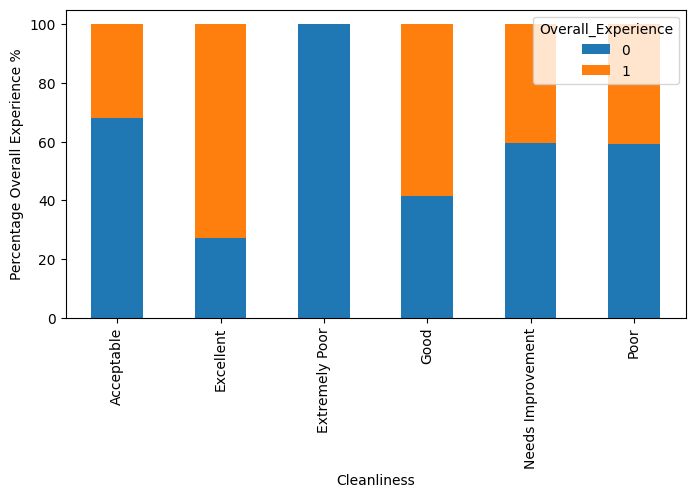

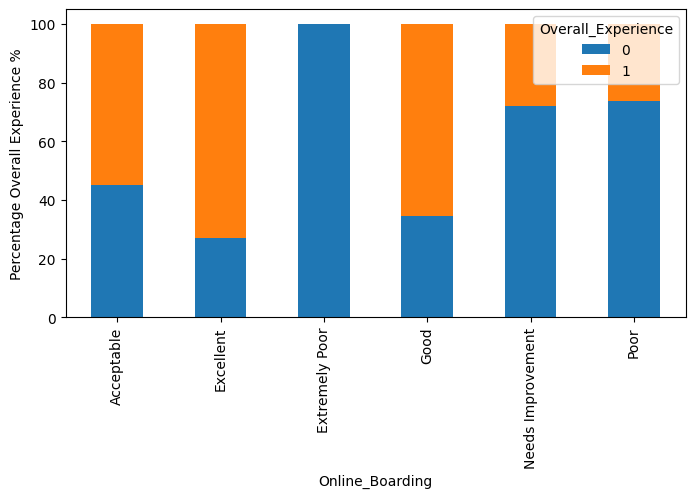

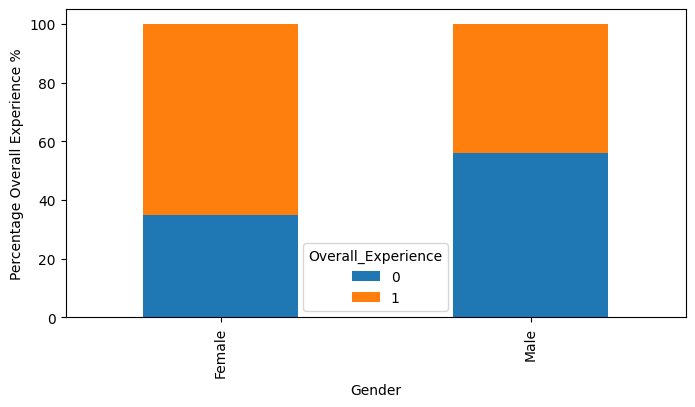

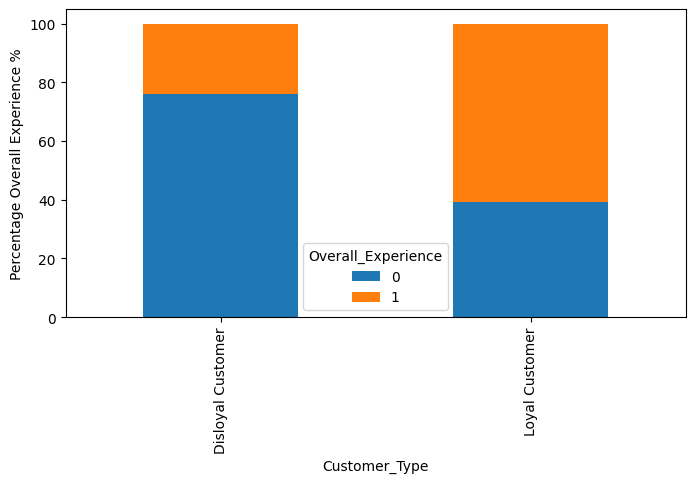

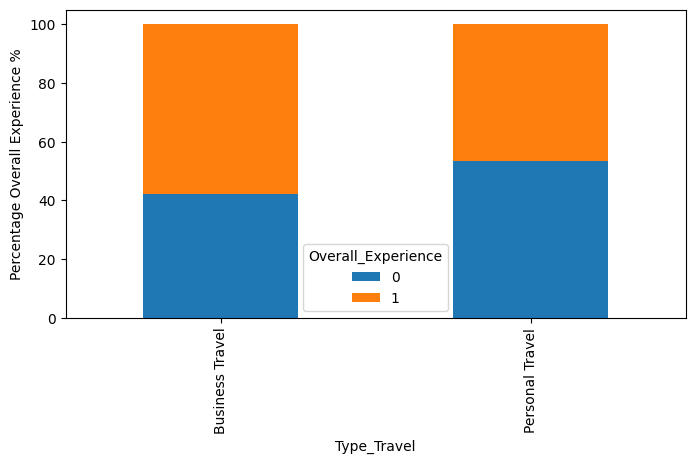

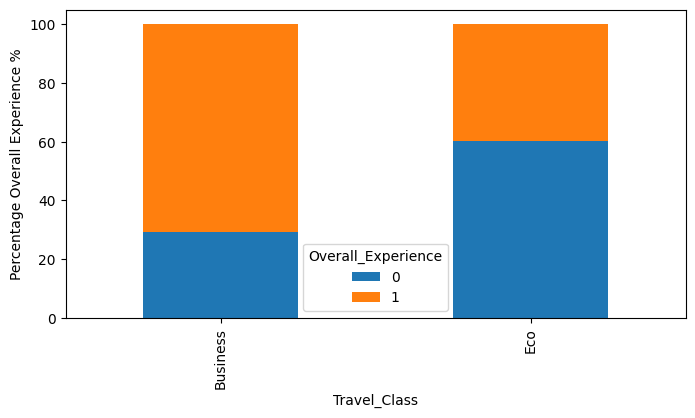

In [56]:
for i in cat_cols:
    if i!='Overall_Experience':
        (pd.crosstab(train_data[i],train_data['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Overall Experience %')

In [57]:
# Promedio de las variables numericas
train_data.groupby(['Overall_Experience'])[num_cols].mean()

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,,
0,0.0,37.490902,2025.826088,17.736866,18.379233
1,1.0,41.019152,1939.962650,12.084747,12.207160


<Axes: >

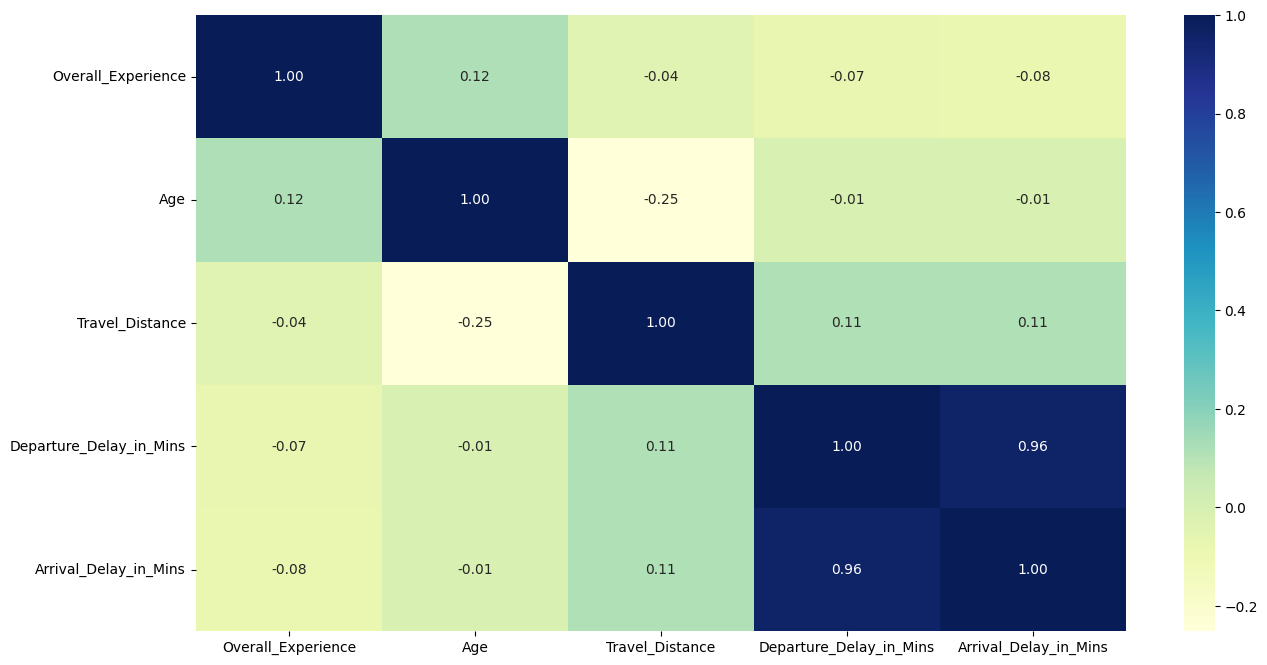

In [58]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(train_data[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

*** De las graficas podemos ver que Seat_Comfort, Seat_Class no aportan valor y podrian eliminarse.
De el comparativo de las variables numericas podemos ver que las variavbles de retraso tienen una fuerte correlacion con la experiencia***

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separar las características y la variable objetivo
X = train_data.drop(columns=['ID', 'Overall_Experience'])
y = train_data['Overall_Experience']

# Identificar las columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Aplicar One-Hot Encoding a las variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

# Combinar las variables codificadas y normalizadas
X_processed = pd.concat([X_scaled_df.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Ver las primeras filas de los datos procesados
display(X_processed.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
0,0.832369,-1.660469,-0.384165,-0.260781,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.567712,0.215099,-0.148112,-0.391103,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.236891,-0.892926,1.635398,2.710567,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.303056,-1.166284,-0.043200,0.078057,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.700041,0.002054,-0.384165,-0.391103,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = log_reg.predict(X_val)

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")

Accuracy of Logistic Regression: 0.9035


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_rf = random_forest.predict(X_val)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")

Accuracy of Random Forest: 0.9490


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir la grilla de parámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar el GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Entrenar el modelo
grid_search_rf.fit(X_train, y_train)

# Mejores parámetros y mejor modelo
print("Mejores parámetros:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_









Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [12]:
# Cargar los archivos CSV del conjunto de prueba
survey_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Surveydata_test.csv')
travel_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Traveldata_test.csv')

# Unir los datos de encuesta y de viaje
test_data = pd.merge(survey_test, travel_test, on='ID')

In [13]:
missing_values = test_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64


In [14]:
# Determinar las columnas numéricas excluyendo 'Overall_Experience' desde el inicio
numerical_columns = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64'] and col not in ['ID', 'Overall_Experience']]

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Cargar los archivos CSV del conjunto de prueba
survey_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Surveydata_test.csv')
travel_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Traveldata_test.csv')

# Unir los datos de encuesta y de viaje
test_data = pd.merge(survey_test, travel_test, on='ID')

# Imputar valores faltantes para variables categóricas utilizando la moda del conjunto de entrenamiento
for col in categorical_columns:
    test_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Imputar valores faltantes para variables numéricas utilizando la media del conjunto de entrenamiento
for col in numerical_columns:
    test_data[col].fillna(train_data[col].mean(), inplace=True)

# Preparar las características del conjunto de prueba (excluyendo 'ID')
X_test = test_data.drop(columns=['ID'])

# Aplicar la misma codificación One-Hot utilizada para el conjunto de entrenamiento
X_test_encoded = encoder.transform(X_test[categorical_columns])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Aplicar la misma normalización utilizada para el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test[numerical_columns])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns)

# Combinar las variables codificadas y normalizadas
X_test_processed = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [16]:
X_test_processed.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
0,-0.226258,-1.407540,-0.384165,-0.391103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.218722,-0.538825,-0.148112,0.338702,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.361683,0.829911,-0.384165,-0.391103,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.689408,-0.609840,-0.384165,-0.391103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,-1.417214,-0.358856,0.061712,-0.391103,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
import numpy as np
probabilities = optimized_rf.predict_proba(X_test_processed)
predictions = np.where(probabilities[:, 1] > 0.5, 1, 0)  # Ajusta el umbral aquí según sea necesario

# Generar el archivo CSV con las nuevas predicciones
submission = pd.DataFrame({
    'ID': test_data['ID'],
    'Overall_Experience': predictions
})
submission.to_csv('submission.csv', index=False)

NameError: name 'optimized_rf' is not defined

In [18]:
from google.colab import files

# Asegúrate de que el nombre del archivo y la ruta sean correctos
files.download('submission.csv')

FileNotFoundError: Cannot find file: submission.csv

In [19]:
# Asegurarte de que todas las predicciones están presentes
print("Número de IDs:", len(test_data['ID']))
print("Número de predicciones:", len(predictions))

Número de IDs: 35602


NameError: name 'predictions' is not defined

In [ ]:
# Obtener las probabilidades de la clase 1
probabilidades_clase_1 = optimized_rf.predict_proba(X_test_processed)[:, 1]

# Ver las primeras 10 probabilidades para la clase 1
print("Primeras 20 probabilidades para la clase 1:", probabilidades_clase_1[:20])

# Estadísticas básicas para las probabilidades de la clase 1
print("Estadísticas de probabilidades para la clase 1:")
print("Mínimo:", probabilidades_clase_1.min())
print("Máximo:", probabilidades_clase_1.max())
print("Promedio:", probabilidades_clase_1.mean())
print("Mediana:", np.median(probabilidades_clase_1))

Primeras 20 probabilidades para la clase 1: [1.    0.74  1.    0.235 0.99  0.575 0.03  0.92  0.555 0.075 0.13  0.995
 0.3   0.025 0.    0.095 0.035 0.14  0.89  0.61 ]
Estadísticas de probabilidades para la clase 1:
Mínimo: 0.0
Máximo: 1.0
Promedio: 0.5480760912308297
Mediana: 0.665


In [ ]:
# Crear un DataFrame para el archivo de envío
submission = pd.DataFrame({
    'ID': test_data['ID'],
    'Overall_Experience': y_test_pred
})

# Convertir las predicciones en enteros y asegurarse de que no sean interpretadas como nulas o vacías
submission['Overall_Experience'] = submission['Overall_Experience'].astype(int)

# Verificar que no hay celdas vacías o nulas
print(submission.isnull().sum())

# Guardar este DataFrame en un archivo CSV asegurando que todos los datos sean cadenas
# Esto puede ayudar con problemas de visualización en Excel
submission.to_csv('submission.csv', index=False, sep=',', encoding='utf-8')

ID                    0
Overall_Experience    0
dtype: int64


In [ ]:
from google.colab import files

# Asegúrate de que el nombre del archivo y la ruta sean correctos
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>